<a href="https://colab.research.google.com/github/cw805/MATH-242/blob/main/Primes_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primes Project**

**Due: Friday, April 22**

This project has two parts, both involving prime numbers.

**Part 1**: Implement the Sieve of Sundaram and compare it with the Sieve of Eratosthenes. The Sieve
of Sundaram algorithm is found on page 138 in Computational Mathematics, chapter 4. Compare the runtime required for computing lists of primes with each sieve method. You should measure the runtime of each sieve for computing the primes up to n, for various n. Then make a plot that shows your results (n on the horizontal axis, runtimes on the vertical axis).


**Part 2**: Investigate at least two (three for a score of Excellent) of the following conjectures about primes. For each, either provide computational evidence in support of the conjecture, or find a counterexample showing that the conjecture is false.

**Conjecture A.** Every even integer greater than 2 is the sum of two primes.

**Conjecture B.** For every $N$, the number of nonnegative integers less than $N$ with an even number of prime factors is less than the number of nonnegative integers less than N with an odd number of prime factors. For this, prime factors are counted with *multiplicity*; e.g.,  $24 = 2^3 · 3$ has 4 prime factors, while  $588 = 22 · 3 · 7^2$ has 5 prime factors.

**Conjecture C.** For every positive integer n, there exists at least one prime between $n^2$ and $(n + 1)^2$

**Conjecture D**. All odd numbers greater than 1 are either prime, or can be expressed as the sum of a prime and twice a square.

To receive a grade of Excellent, your notebook should further exhibit the following:
- You investigate three of the above conjectures. For each, you either find evidence in support
of the conjecture or a counterexample that disproves it.
- Computational methodology demonstrates mastery of the computational techniques that we
have studied in this course.
- Exposition is clear and precise, thoroughly explaining your methodology and reasoning. Any assumptions necessary for the estimates are reasonable and clearly stated.
- The work may extend beyond the project requirements in a creative or insightful direction.


## Preliminary Code
First import modules:

In [65]:
import math   # for sqrt and other math functions
import time   # for runtime analysis
import matplotlib.pyplot as plt  # for plotting
import sympy

# Part 1 - Sieve of Sundaram vs. Eratosthenes (Ch.4 p.138 )
Compare the runtime required for computing lists of primes with each sieve method. You should 

- measure the runtime of each sieve for computing the primes up to n, for various n. 

- Then make a plot that shows your results (n on the horizontal axis, runtimes on the vertical axis).

## Sieve of Eratosthenes

We will implement the *fastEroatos()* function that we've been working with in class. The function will simply replace composite numbers with zero. The nonzero numbers that remain will be our list of primes.

In [66]:
def fastEratos(nMax):
  # start with a list 2, 3, 4, ..., nMax
  nums = list(range(2,nMax+1))

  # compute the sqare root of nMax
  nroot = math.sqrt(nMax)

  i = 0 # index of smallest item in nums
  while nums[i] <= nroot:

    if nums[i] > 0:   # then nums[i] is prime, so set all of its multiples to zero
      j = i + nums[i] # this index of twice the prime nums[i]
      while j < len(nums):
        nums[j] = 0
        j += nums[i]    # go to the next multiple of the prime nums[i]

    i += 1  # go to the next smallest item in nums

  # all nonzero numbers that remain in our list are prime
  primes = [n for n in nums if n != 0]
  return primes

Now measure the runtime of this implementation. This is the function that will measure and return the runtime of fastEratos(nMax).

In [8]:
def timeEratos(nMax):
  startTime = time.time()
  fastEratos(nMax)
  endTime = time.time()
  #print("runtime:", endTime - startTime)
  return endTime - startTime

In [7]:
timeEratos(1000)

0.0006604194641113281

Another way to measure the runtime for computing the primes up to n, for various n.

In [8]:
%time primes = fastEratos(100)

CPU times: user 61 µs, sys: 4 µs, total: 65 µs
Wall time: 68.2 µs


In [9]:
%time primes = fastEratos(10000)

CPU times: user 5.33 ms, sys: 0 ns, total: 5.33 ms
Wall time: 5.53 ms


In [10]:
%time primes = fastEratos(1000000)

CPU times: user 581 ms, sys: 10.8 ms, total: 592 ms
Wall time: 597 ms


In [4]:
%time primes = fastEratos(10000000)

CPU times: user 7.04 s, sys: 240 ms, total: 7.28 s
Wall time: 7.37 s


Now we will make a list of the `nMax` values that we will test, and then we will measure the runtimes and store them in a list. 

In [19]:
nMaxVals = range(10000,200000,10000)
runtimes = [timeEratos(n) for n in nMaxVals]  # list comprehension -- makes a list of runtime values
#print(runtimes)

It would be much nicer to plot these runtimes. For plotting in Python we will use the `matplotlib.pyplot` module, which we imported above. 

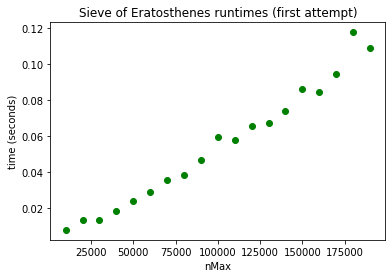

In [20]:
plt.plot(nMaxVals, runtimes, 'go') # creates the plot; syntax is plot(xvals, yvals, format)
plt.title("Sieve of Eratosthenes runtimes (first attempt)")
plt.xlabel("nMax")
plt.ylabel("time (seconds)");

## Sieve of Sundaram


In [119]:
def sundaram(n):

  m = int((n - 1)/2)

  nums = list(range(1, m + 1))
  i = 1

  for i in range(1, m + 1):    
    while (2*i + 2*i**2) <= m:      
      j = i   
      while (i + j + 2(i*j))  <= m:     
        
        w = (i + j + 2(i*j))         
        if w in nums:
          nums[w] = 1  
          j += 1
      i +=  1

  if (n > 2):
        print(2," ") 

  for i in range(1, m + 1):
        if (nums[i] == 0):
            print((2 * i + 1)," ");       

  primes = [2*b + 1 for b in nums]
  return primes

In [122]:
def SieveOfSundaram(n):
  
    nNew = int((n - 1) / 2);
 
 
    marked = [0] * (nNew + 1);
 

    for i in range(1, nNew + 1):
        j = i;
        while((i + j + 2 * i * j) <= nNew):
            marked[i + j + 2 * i * j] = 1;
            j += 1;
 
    # Since 2 is a prime number
    if (n > 2):
        print(2, end = " ");
 
    # Print other primes. Remaining
    # primes are of the form 2*i + 1
    # such that marked[i] is false.
    for i in range(1, nNew + 1):
        if (marked[i] == 0):
            print((2 * i + 1), end = " ")

In [123]:
SieveOfSundaram(20)

2 3 5 7 11 13 17 19 

In [99]:
m = 20
nums = list(range(1, m + 1))
print(nums)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


# Part 2: Investigate the following conjectures about primes. 
For each, either provide computational evidence in support of the conjecture, or find a counterexample showing that the conjecture is false.


**Conjecture A.** Every even integer greater than 2 is the sum of two primes.

**Conjecture B.** For every $N$, the number of nonnegative integers less than $N$ with an even number of prime factors is less than the number of nonnegative integers less than N with an odd number of prime factors. For this, prime factors are counted with *multiplicity*; e.g.,  $24 = 2^3 · 3$ has 4 prime factors, while  $588 = 22 · 3 · 7^2$ has 5 prime factors.

**Conjecture C.** For every positive integer n, there exists at least one prime between $n^2$ and $(n + 1)^2$

**Conjecture D**. All odd numbers greater than 1 are either prime, or can be expressed as the sum of a prime and twice a square.

In [ ]:
# Conjecture A. Every even integer greater than 2 is the sum of two primes.



In [ ]:
# Conjecture C. For every positive integer n, there exists at least one prime between  𝑛2  and  (𝑛+1)2

**Conjecture D**. All odd numbers greater than 1 are either prime, or can be expressed as the sum of a prime and twice a square.

In [149]:
def isOdd(n): # test using : isOdd(50)

  #while n > 1:
    if n % 2 == 0:
      return False
    else:
      return True


def oddList(nMax): # test using: oddList(50)
  
  oddsList = []

  for n in range(nMax + 1):
      if isOdd(n):
        oddsList.append(n)

# return the list of odd numbers
  return oddsList

In [150]:
print(oddList(50))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [ ]:
# Conjecture D. All odd numbers greater than 1 are either prime, or can be expressed as the sum of a prime and twice a square.

def oddPrimes(nMax):

  primeList = fastEratos(nMax)
  j = list(1, nMax + 1) # random integer
  
  twiceSquare  = 2(j**2)
  